<a href="https://colab.research.google.com/github/dhillonarman/standup-comedy-nlp-analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Introduction

We are going to find some more obvious patterns with EDA. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm2.pkl')
data = data.transpose()
data.head()


,ali,anthony,joe,john,mike,ronny
abc,1,0,0,0,0,0
ability,0,0,0,0,0,1
able,2,0,2,3,0,1
abortion,0,2,0,0,0,0
abruptly,0,0,0,0,0,1


In [ ]:
data.columns

Index(['ali', 'anthony', 'joe', 'john', 'mike', 'ronny'], dtype='object')

In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('im', 74),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('know', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('need', 14),
  ('hes', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('dude', 12),
  ('work', 12)],
 'anthony': [('im', 60),
  ('dont', 38),
  ('joke', 37),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('just', 30),
  ('know', 27),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 23),
  ('youre', 19),
  ('tell', 19),
  ('right', 18),
  ('grandma', 18),
  ('thing', 17),
  ('jokes', 17),
  ('think', 17),
  ('time', 17),
  ('good', 16),
  ('yeah', 16),
  ('school', 16),
  ('did', 16),
  ('gonna', 15),
  ('baby', 15),
  ('ive', 15),
  ('family', 14),
  ('mad', 14)],
 

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
im, just, dont, shit, thats, youre, gonna, know, ok, lot, wanna, gotta, oh, husband
---
anthony
im, dont, joke, got, said, thats, just, know, anthony, day, say, guys, people, youre
---
joe
people, just, dont, fcking, im, fck, thats, gonna, theyre, youre, think, shit, got, theres
---
john
just, dont, said, know, clinton, im, thats, right, youre, old, little, hey, time, got
---
mike
im, said, just, dont, thats, think, says, know, cause, right, jenny, goes, id, really
---
ronny
just, im, right, dont, know, people, thats, look, fun, fucking, yeah, love, fuck, theyre
---


In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['im',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'know',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'god',
 'need',
 'hes',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'work',
 'im',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'just',
 'know',
 'anthony',
 'day',
 'say',
 'guys',
 'people',
 'youre',
 'tell',
 'right',
 'grandma',
 'thing',
 'jokes',
 'think',
 'time',
 'good',
 'yeah',
 'school',
 'did',
 'gonna',
 'baby',
 'ive',
 'family',
 'mad',
 'people',
 'just',
 'dont',
 'fcking',
 'im',
 'fck',
 'thats',
 'gonna',
 'theyre',
 'youre',
 'think',
 'shit',
 'got',
 'theres',
 'right',
 'man',
 'know',
 'house',
 'kids',
 'oh',
 'cause',
 'white',
 'say',
 'life',
 'real',
 'really',
 'dude',
 'going',
 'time',
 'gotta',
 'just',
 'dont',
 'said',
 'know',
 'clinton',
 'im',
 'thats',
 'right',
 'youre',
 'old',
 'little',
 'hey',
 'time',
 'got',
 'cause',
 'mom',
 'people',
 

In [ ]:
top

['just',
 'im',
 'right',
 'dont',
 'know',
 'people',
 'thats',
 'look',
 'fun',
 'fucking',
 'yeah',
 'love',
 'fuck',
 'theyre',
 'mom',
 'money',
 'time',
 'chinese',
 'malaysia',
 'youre',
 'theres',
 'doing',
 'way',
 'day',
 'america',
 'got',
 'shit',
 'good',
 'trying',
 'want']

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('im', 6),
 ('just', 6),
 ('dont', 6),
 ('thats', 6),
 ('youre', 6),
 ('know', 6),
 ('time', 6),
 ('got', 6),
 ('right', 6),
 ('people', 6),
 ('gonna', 5),
 ('oh', 4),
 ('cause', 4),
 ('day', 4),
 ('yeah', 4),
 ('say', 4),
 ('think', 4),
 ('shit', 3),
 ('theyre', 3),
 ('said', 3),
 ('really', 3),
 ('way', 3),
 ('gotta', 2),
 ('tell', 2),
 ('dude', 2),
 ('good', 2),
 ('theres', 2),
 ('real', 2),
 ('going', 2),
 ('mom', 2),
 ('want', 2),
 ('ok', 1),
 ('lot', 1),
 ('wanna', 1),
 ('husband', 1),
 ('women', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('hes', 1),
 ('work', 1),
 ('joke', 1),
 ('anthony', 1),
 ('guys', 1),
 ('grandma', 1),
 ('thing', 1),
 ('jokes', 1),
 ('school', 1),
 ('did', 1),
 ('baby', 1),
 ('ive', 1),
 ('family', 1),
 ('mad', 1),
 ('fcking', 1),
 ('fck', 1),
 ('man', 1),
 ('house', 1),
 ('kids', 1),
 ('white', 1),
 ('life', 1),
 ('clinton', 1),
 ('old', 1),
 ('little', 1),
 ('hey', 1),
 ('cow', 1),
 ('wife', 1),
 ('went', 1),
 ('dad', 1),
 ('walked', 1),
 ('says',

In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['im',
 'just',
 'dont',
 'thats',
 'youre',
 'know',
 'time',
 'got',
 'right',
 'people',
 'gonna',
 'oh',
 'cause',
 'day',
 'yeah',
 'say',
 'think',
 'shit',
 'theyre',
 'said',
 'really',
 'way']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('corpus.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# print(stop_words)

# Convert the frozenset to a list
stop_words = list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
# data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
stop_words


['she',
 'part',
 'ltd',
 'amount',
 'whence',
 'whereupon',
 'themselves',
 'each',
 'what',
 'empty',
 'to',
 'amongst',
 'might',
 'same',
 'yeah',
 'why',
 'describe',
 'ten',
 'now',
 'must',
 'before',
 'both',
 'never',
 'all',
 'seeming',
 'call',
 'seems',
 'although',
 'been',
 'last',
 'nothing',
 'somehow',
 'ever',
 'since',
 'during',
 'were',
 'theyre',
 'such',
 'nowhere',
 'above',
 'into',
 'fifty',
 'other',
 'less',
 'he',
 'moreover',
 'among',
 'even',
 'few',
 'formerly',
 'name',
 'ourselves',
 'etc',
 'enough',
 'several',
 'ie',
 'cause',
 'least',
 'out',
 'very',
 'inc',
 'below',
 'therein',
 'towards',
 'full',
 'forty',
 'your',
 'whereas',
 'noone',
 'detail',
 'elsewhere',
 'anyway',
 'most',
 'hereby',
 'him',
 'being',
 'meanwhile',
 'four',
 'otherwise',
 'sincere',
 'how',
 'the',
 'third',
 'system',
 'along',
 'without',
 'becoming',
 'of',
 'youre',
 'together',
 'also',
 'back',
 'their',
 'next',
 'due',
 'anything',
 'seemed',
 'twelve',
 'som

In [ ]:
print(data_clean.columns)


Index(['transcript'], dtype='object')


In [ ]:
!pip install wordcloud


In [ ]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
wc

In [ ]:
data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...
mike,wow hey thank you thanks thank you guys hey se...
ronny,ladies and gentlemen make some noise for r...


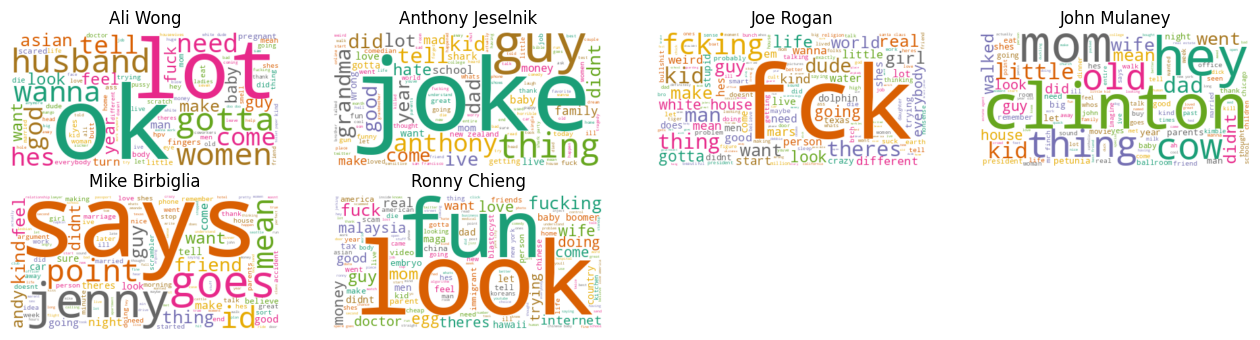

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Joe Rogan', 'John Mulaney', 'Mike Birbiglia','Ronny Chieng']

# Iterate through each comedian in the dataset
for index, comedian in enumerate(data_clean.index):
    text = data_clean.loc[comedian, 'transcript']

    if not isinstance(text, str) or text.strip() == "":
        print(f"Skipping {comedian}: No valid transcript data.")
        continue

    wc.generate(text)  # Generate word cloud
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()


### Findings

Ali: Talks a lot about women, husbands, and wanna. Sounds like relationship and marriage jokes are a big part of her set. Maybe she’s got a bit about married life struggles?

Anthony: Joke and guy are huge here. Seems like he’s doing a lot of meta-comedy, maybe making fun of how jokes work or telling funny stories about people.

Joe: The F-word is all over the place, along with kid, life, and man. Sounds like raw, unfiltered comedy—maybe rants about life, parenting, or just strong opinions on everyday things.

John: Clinton, mom, old, wife—this dude is probably diving into family life, and generational differences.

Mike: Says, goes, mean, Jenny—this reads like a storytelling comic who quotes a lot of people. Maybe he’s doing impressions or playing out full conversations in his jokes.

Ronny: Fun, look, and the F-word again. High-energy delivery, a mix of observational humor.

## Number of Words

### Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,1052
0,Ali Wong,1401
3,John Mulaney,1461
2,Joe Rogan,1497
4,Mike Birbiglia,1557
5,Ronny Chieng,1591


In [ ]:
unique_list

[1401, 1052, 1497, 1461, 1557, 1591]

In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 63, 62, 76, 65 ]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1052,2954,59,50.067797
0,Ali Wong,1401,3184,60,53.066667
4,Mike Birbiglia,1557,4498,76,59.184211
5,Ronny Chieng,1591,3983,65,61.276923
3,John Mulaney,1461,3873,62,62.467742
2,Joe Rogan,1497,4490,63,71.269841


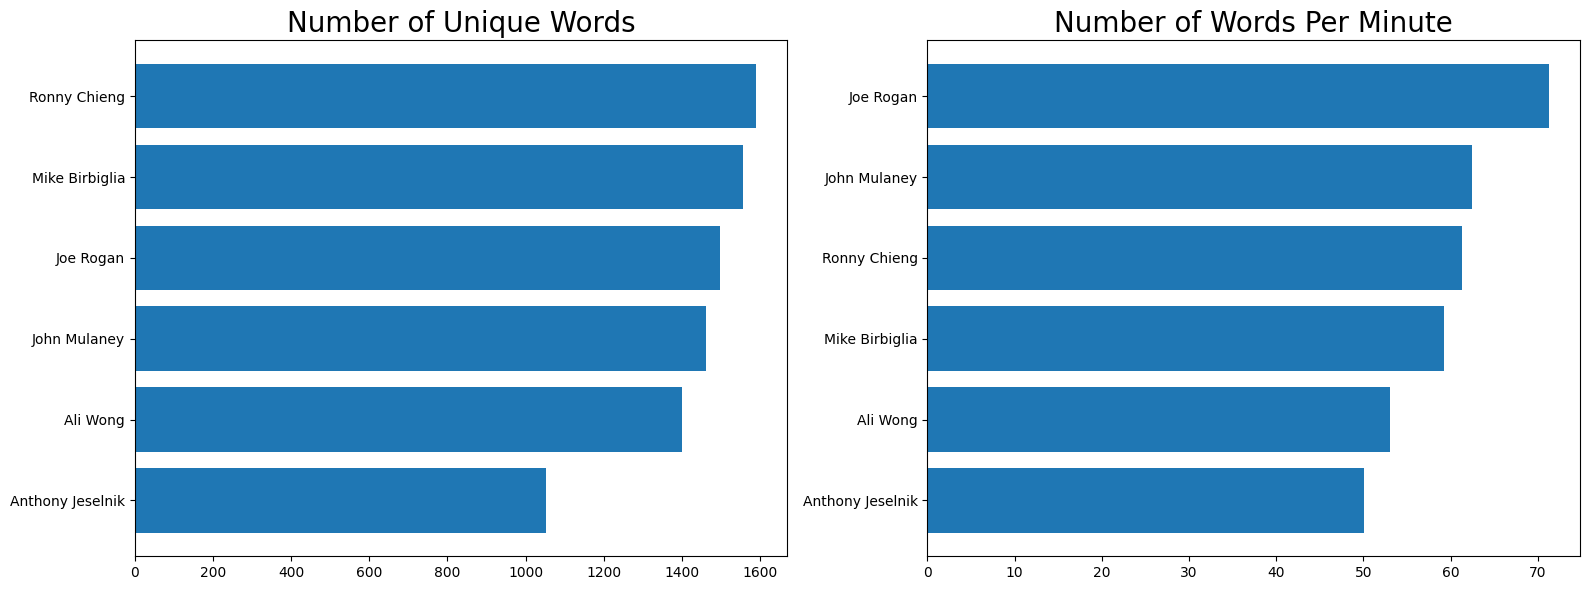

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ronny and Mike use a lot of words in their comedy
   * Anthony has a smaller vocabulary followed by Ali


* **Talking Speed**

   * Despite having small vocabulary Anthony takes significant amount of time to speak.
   
   * Although Ronny Chieng has more vocabulary but Joe talks faster than Ronny   




## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('im', 6),
 ('just', 6),
 ('dont', 6),
 ('thats', 6),
 ('youre', 6),
 ('know', 6),
 ('time', 6),
 ('got', 6),
 ('right', 6),
 ('people', 6),
 ('gonna', 5),
 ('oh', 4),
 ('cause', 4),
 ('day', 4),
 ('yeah', 4),
 ('say', 4),
 ('think', 4),
 ('shit', 3),
 ('theyre', 3),
 ('said', 3),
 ('really', 3),
 ('way', 3),
 ('gotta', 2),
 ('tell', 2),
 ('dude', 2),
 ('good', 2),
 ('theres', 2),
 ('real', 2),
 ('going', 2),
 ('mom', 2),
 ('want', 2),
 ('ok', 1),
 ('lot', 1),
 ('wanna', 1),
 ('husband', 1),
 ('women', 1),
 ('pregnant', 1),
 ('god', 1),
 ('need', 1),
 ('hes', 1),
 ('work', 1),
 ('joke', 1),
 ('anthony', 1),
 ('guys', 1),
 ('grandma', 1),
 ('thing', 1),
 ('jokes', 1),
 ('school', 1),
 ('did', 1),
 ('baby', 1),
 ('ive', 1),
 ('family', 1),
 ('mad', 1),
 ('fcking', 1),
 ('fck', 1),
 ('man', 1),
 ('house', 1),
 ('kids', 1),
 ('white', 1),
 ('life', 1),
 ('clinton', 1),
 ('old', 1),
 ('little', 1),
 ('hey', 1),
 ('cow', 1),
 ('wife', 1),
 ('went', 1),
 ('dad', 1),
 ('walked', 1),
 ('says',

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
joe,0,40
john,4,6
mike,0,0
ronny,49,17


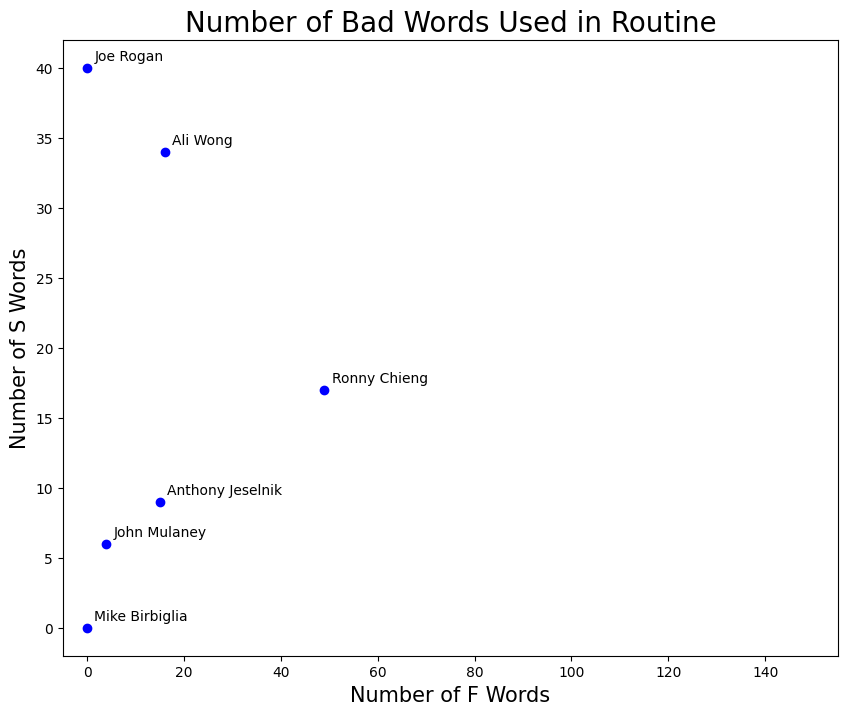

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Words', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **F-Words!** - People with too much swearing, especially the f-word and dark humor are becoming famous nowadays on social media which is probably the reason why I've heard of Joe.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like as I dont like swearing. It would help people like me to find Mike for entertainment.

* Profanity trends stood out as interesting—confirming that swear words are a big part of some comedians’ styles.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

It's better to see some non-perfect but acceptable results to help us quickly decide whether our project is a dud or not, instead of having analysis paralysis and never delivering anything.



What other word counts do you think would be interesting to compare instead of the f-word and s-word?

In [ ]:
# Isolate relevant words for comparison
data_selected_words = data.transpose()[[
    'mom', 'dad', 'wife', 'husband', 'baby', 'kid', 'grandma', 'parents',
    'joke', 'fun', 'laugh', 'thing', 'says', 'look'
]]

data_family_words = data_selected_words[['mom', 'dad', 'wife', 'husband', 'baby', 'kid', 'grandma', 'parents']].sum(axis=1)
data_humor_words = data_selected_words[['joke', 'fun', 'laugh', 'thing', 'says', 'look']].sum(axis=1)

data_comparison = pd.concat([data_family_words, data_humor_words], axis=1)
data_comparison.columns = ['family_words', 'humor_words']



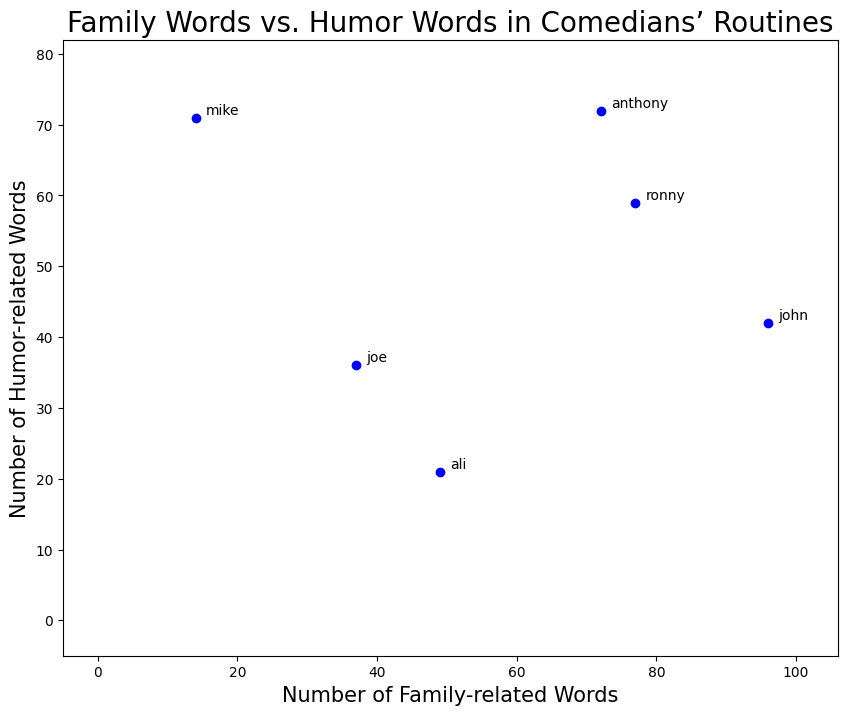

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_comparison.index):
    x = data_comparison.family_words.loc[comedian]
    y = data_comparison.humor_words.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x + 1.5, y + 0.5, comedian, fontsize=10)

plt.xlim(-5, max(data_comparison.family_words) + 10)
plt.ylim(-5, max(data_comparison.humor_words) + 10)

plt.title('Family Words vs. Humor Words in Comedians’ Routines', fontsize=20)
plt.xlabel('Number of Family-related Words', fontsize=15)
plt.ylabel('Number of Humor-related Words', fontsize=15)

plt.show()

# **Findings**

John Mulaney talks the most about family but balances it with humor.

Anthony Jeselnik & Ronny Chieng mix high humor with family-related topics.

Mike Birbiglia focuses more on jokes than family themes.